# Initializatoin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab\ Notebooks/Deep\ Learning\ Course/HW03

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Deep Learning Course/HW03'
/content


## Imports

In [7]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.autograd import Variable
from torch.nn import Parameter

from name_dataset import Dataset

# RNN

## Traditional RNN

In the introductory section, we delve into the architecture of Recurrent Neural Networks (RNNs) and elucidate their training methodologies. To gain a deeper understanding of RNNs, you're encouraged to explore further [HERE](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-network)

For the task at hand, you've been furnished with the Names dataset, a compilation comprising thousands of surnames from 18 distinct languages of origin. Your objective is to prognosticate the language of origin for a given name, relying solely on its orthography. Your task primarily involves implementing the section demarcated by `#your_code`.

In [ ]:
dataset = Dataset()
for i in range(10):
    category, line, _, _ = dataset.randomTrainingExample()
    print('category =', category, '- random name =', line)

Files already exist, skipping download and extraction.
category = Czech - random name = Kopecky
category = English - random name = Olivier
category = Portuguese - random name = Araullo
category = Chinese - random name = Eng
category = Italian - random name = Bassi
category = Italian - random name = Antonino
category = Japanese - random name = Kase
category = Korean - random name = Hwang
category = Portuguese - random name = Nunes
category = Arabic - random name = Hakimi


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size

        # Layers
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

# Example instantiation:
n_hidden = 128
n_letters = dataset.n_letters  # Replace with actual number of letters
n_categories = dataset.n_categories  # Replace with actual number of categories
rnn = RNN(n_letters, n_hidden, n_categories)


In [ ]:
#your_code
criterion = nn.NLLLoss()
learning_rate = 0.005

def train(category_tensor, name_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()

    #your_code
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

And here you can train your model and see it's performance after each 5000 iterations

5000 5% 2.9327 Morcos is predicted as a "Greek" name, status = ✗ (Arabic)
10000 10% 2.2488 Kleid is predicted as a "Scottish" name, status = ✗ (German)
15000 15% 0.9264 Fernandes is predicted as a "Portuguese" name, status = ✓
20000 20% 1.3921 Demetrious is predicted as a "Portuguese" name, status = ✗ (Greek)
25000 25% 0.8064 Weng is predicted as a "Chinese" name, status = ✓
30000 30% 2.0716 Kealey is predicted as a "German" name, status = ✗ (English)
35000 35% 0.1826 Liatos is predicted as a "Greek" name, status = ✓
40000 40% 2.5142 Martin is predicted as a "Russian" name, status = ✗ (Scottish)
45000 45% 1.2160 Cha is predicted as a "Vietnamese" name, status = ✗ (Korean)
50000 50% 1.3519 Bellerose is predicted as a "Italian" name, status = ✗ (French)
55000 55% 0.2960 Agelakos is predicted as a "Greek" name, status = ✓
60000 60% 0.1080 Martinovsky is predicted as a "Russian" name, status = ✓
65000 65% 1.0790 Blades is predicted as a "Greek" name, status = ✓
70000 70% 1.4121 Mifsud is p

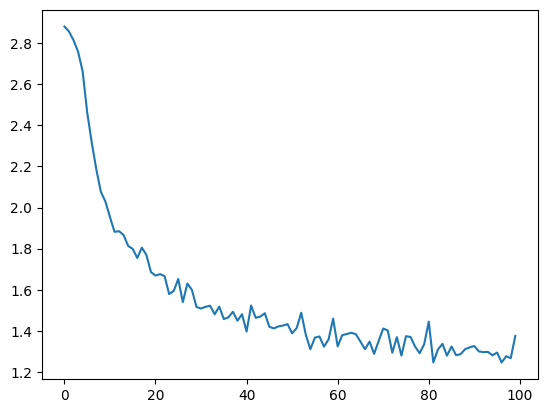

In [ ]:
n_iters = 100000
print_every = 5000

current_loss = 0
all_losses = []

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = dataset.randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    if iter % print_every == 0:
        guess, _ = dataset.categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% %.4f %s is predicted as a "%s" name, status = %s' % (iter, iter / n_iters * 100, loss, line, guess, correct))

    if iter % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

plt.figure()
plt.plot(all_losses)

## Traditional RNN Disadvantages

In this part, we aim to delve into the limitations of traditional RNNs:
1.   Recurrent computation is slow
2.   They have difficulty accessing information from many steps back.

You are provided with a simple code that helps you to give the idea better. By modifying this code, you are able to demonstrate the mentioned disadvantages, but you are also free to change the code if needed or use any dataset you want.

**Question:** Do you think using GPU instead of CPU completely solves the first problem? No

Note: The main goal of this part is to help you understand these problems better. Don't be too hard to implement and delivery.

Epoch [10/100], Loss: 1.0822
Epoch [20/100], Loss: 1.0069
Epoch [30/100], Loss: 0.9345
Epoch [40/100], Loss: 0.8603
Epoch [50/100], Loss: 0.7789
Epoch [60/100], Loss: 0.6826
Epoch [70/100], Loss: 0.5664
Epoch [80/100], Loss: 0.4392
Epoch [90/100], Loss: 0.3169
Epoch [100/100], Loss: 0.2123


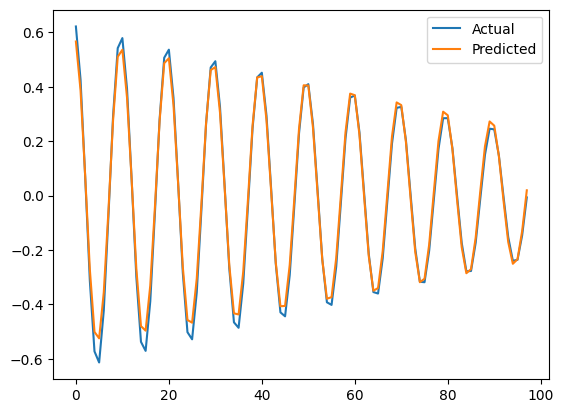

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate sinusoidal temperature data with decreasing range over time
np.random.seed(0)
num_periods = 50
timesteps_per_period = 10
total_timesteps = num_periods * timesteps_per_period

# Generate decreasing factor
decreasing_factor = np.linspace(1, 0.1, total_timesteps)

# Generate temperature data with decreasing sinusoidal range
temperature_data = np.sin(np.linspace(0, 2*np.pi*num_periods, total_timesteps)) * decreasing_factor

# Normalize the data
temperature_data = (temperature_data - np.mean(temperature_data)) / np.std(temperature_data)

# Convert numpy array to PyTorch tensor
temperature_data = torch.tensor(temperature_data, dtype=torch.float32).view(-1, 1)

# Define function to create dataset with sinusoidal pattern
def create_dataset(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        seq_in = data[i:i+seq_length]
        seq_out = data[i+seq_length]
        X.append(seq_in)
        Y.append(seq_out)
    return torch.stack(X), torch.stack(Y)

# Define sequence length and create dataset
sequence_length = 10  # Number of previous days to look at for prediction
X, Y = create_dataset(temperature_data, sequence_length)

# Split the dataset into train and test sets
train_size = int(0.8 * len(X))
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Define RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Define model parameters
input_size = 1
hidden_size = 10
output_size = 1

# Instantiate the model
model = SimpleRNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)

# Plot actual vs predicted
plt.plot(Y_test.numpy(), label='Actual')
plt.plot(test_predictions.numpy(), label='Predicted')
plt.legend()
plt.show()

# LSTM Preparation

Now that you have experience with traditional RNNs, it's time to implement the LSTM model. Your goal is to implement the cell and model for LSTM architecture. The proposed dataset for this section is MNIST, allowing you to focus solely on model implementation.

In [ ]:
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())

batch_size = 128
n_iters = 6000
num_epochs = int(n_iters / (len(train_dataset) / batch_size))

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

## LSTM Cells

In [ ]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias

        self.xh = nn.Linear(input_size, hidden_size * 4, bias=bias)
        self.hh = nn.Linear(hidden_size, hidden_size * 4, bias=bias)
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / np.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)

    def forward(self, input, hx=None):

        # Inputs:
        #       input: (batch_size, input_size)
        #       hx: (batch_size, hidden_size)
        # Outputs:
        #       hy: (batch_size, hidden_size)
        #       cy: (batch_size, hidden_size)

        if hx is None:
            hx = Variable(input.new_zeros(input.size(0), self.hidden_size))
            hx = (hx, hx)

        hx, cx = hx

        # your code

        gates = self.xh(input) + self.hh(hx)
        gates = gates.view(-1, 4, self.hidden_size)

        i = torch.sigmoid(gates[:, 0, :])
        f = torch.sigmoid(gates[:, 1, :])
        o = torch.sigmoid(gates[:, 2, :])
        g = torch.tanh(gates[:, 3, :])

        cy = (f * cx) + (i * g)
        hy = o * torch.tanh(cy)

        return hy, cy

## LSTM Models

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)

        self.fc = nn.Linear(hidden_dim, output_dim)



    def forward(self, x):

        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
        c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
        hn = h0[0,:,:]
        cn = h0[0,:,:]
        outs = []

        hn, cn = h0.detach(), c0.detach()
        for seq in range(x.size(1)):
            hn, cn = self.lstm(x[:, seq], (hn, cn))
            outs.append(hn)
        out = self.fc(outs[-1].squeeze())
        return out

In [ ]:
input_dim = 28
hidden_dim = 128
layer_dim = 1  # ONLY 1 OR 2
output_dim = 10

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
learning_rate = 0.01

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# your code

# Train model and print Loss and Accuracy on Test Dataset after each 500 iterations

train_losses = []

for i in range(num_epochs):
    sum_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        img, label = batch
        img = img.reshape(-1, 28, 28)
        output = model(img)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        sum_loss += loss.item()

    train_losses.append(sum_loss / len(train_dataset))
    print(f"loss in epoch {i}: {sum_loss/ len(train_dataset)}")
    with torch.no_grad():
        sum_loss = 0
        correct = 0
        for batch in test_loader:
            optimizer.zero_grad()
            img, label = batch
            img = img.reshape(-1, 28, 28)
            output = model(img)
            loss = criterion(output, label)
            sum_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(label.view_as(pred)).sum().item()
        print(f"loss on test dataset: {sum_loss/ len(test_dataset)}, accuracy: {correct / len(test_dataset)}")


loss in epoch 0: 0.003203149625596901
loss on test dataset: 0.0011044163376558573, accuracy: 0.9614
loss in epoch 1: 0.0008471365398572137
loss on test dataset: 0.0009196716892998666, accuracy: 0.9675
loss in epoch 2: 0.0006255343071573103
loss on test dataset: 0.0005729820016073063, accuracy: 0.979
loss in epoch 3: 0.00048722485235581795
loss on test dataset: 0.0004974284966592677, accuracy: 0.9821
loss in epoch 4: 0.00045501433595782146
loss on test dataset: 0.0005350478108040989, accuracy: 0.9804
loss in epoch 5: 0.00040874223528274644
loss on test dataset: 0.0005348928015038837, accuracy: 0.9827
loss in epoch 6: 0.0003726506745675579
loss on test dataset: 0.0005020783729793038, accuracy: 0.9807
loss in epoch 7: 0.0003600218856804228
loss on test dataset: 0.0004400858119712211, accuracy: 0.9841
loss in epoch 8: 0.000321494968875777
loss on test dataset: 0.0004770443992689252, accuracy: 0.982
loss in epoch 9: 0.00033115803627879357
loss on test dataset: 0.00047370260499883445, accura

# Sentiment Analysis

Now you are ready to face a real-world problem. In this task, we want you to do a sentiment analysis on the [IMDB dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews). The main goal is to reach more than an acceptable accuracy of **75%** on LSTM model. You are free to use torch.nn.LSTM to design your architecture, but you must prepare the IMDB dataset on your own.

In [8]:
!pip install datasets
#!pip install numpy==1.21.6

In [9]:
from datasets import load_dataset

dataset = load_dataset("stanfordnlp/imdb")


In [10]:
x_train = dataset["train"][:]["text"]
x_test = dataset["test"][:]["text"]
y_train = dataset["train"][:]["label"]
y_test = dataset["test"][:]["label"]

In [11]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from collections import Counter
import numpy as np

def preprocess_string(s):
    s = re.sub(r"[^\w\s]", '', s)
    s = re.sub(r"\s+", '', s)
    s = re.sub(r"\d", '', s)

    return s

def tockenize(x_train,y_train,x_val,y_val):
    word_list = []

    stop_words = set(stopwords.words('english'))
    for sent in x_train:
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)

    corpus = Counter(word_list)
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}

    final_list_train,final_list_test = [],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                     if preprocess_string(word) in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                    if preprocess_string(word) in onehot_dict.keys()])

    encoded_train = [1 if label ==1 else 0 for label in y_train]
    encoded_test = [1 if label ==1 else 0 for label in y_val]
    return np.array(final_list_train), np.array(encoded_train),np.array(final_list_test), np.array(encoded_test),onehot_dict

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:


x_train,y_train,x_test,y_test,vocab = tockenize(x_train,y_train,x_test,y_test)



<ipython-input-11-6d4386a5093f>:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(final_list_train), np.array(encoded_train),np.array(final_list_test), np.array(encoded_test),onehot_dict


In [13]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

x_train_pad = padding_(x_train,500)
x_test_pad = padding_(x_test,500)

In [14]:
from torch.utils.data import Dataset
from transformers import BertTokenizer


class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):

        sample = [self.x[idx], self.y[idx]]
        return sample

In [15]:
train_dataset = CustomDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
test_dataset = CustomDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

In [16]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)


In [17]:


class LSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, _) = self.lstm(embedded)
        hidden = hidden.squeeze(0)
        return self.fc(hidden)

input_dim = len(vocab) + 1
embedding_dim = 100
hidden_dim = 256
output_dim = 2

In [18]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [21]:
model = LSTM(input_dim, embedding_dim, hidden_dim, output_dim).to(device)
learning_rate = 0.01

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [22]:
train_losses = []

num_epochs = 5
for i in range(num_epochs):
    sum_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        txt, label = batch
        txt, label = txt.to(device), label.to(device)
        output = model(txt.squeeze(1))
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        sum_loss += loss.item()

    train_losses.append(sum_loss / len(train_dataset))
    print(f"loss in epoch {i}: {sum_loss/ len(train_dataset)}")
    with torch.no_grad():
        sum_loss = 0
        correct = 0
        for batch in test_loader:
            optimizer.zero_grad()
            txt, label = batch
            txt, label = txt.to(device), label.to(device)
            output = model(txt.squeeze(1))
            loss = criterion(output, label)
            sum_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(label.view_as(pred)).sum().item()
        print(f"loss on test dataset: {sum_loss/ len(test_dataset)}, accuracy: {correct / len(test_dataset)}")

loss in epoch 0: 0.004014127482175827
loss on test dataset: 0.003135763317346573, accuracy: 0.82012
loss in epoch 1: 0.002878470336198807
loss on test dataset: 0.002863614035844803, accuracy: 0.8414
loss in epoch 2: 0.0024648732393980025
loss on test dataset: 0.0029009646463394167, accuracy: 0.84436
loss in epoch 3: 0.0020822649198770525
loss on test dataset: 0.002932732139825821, accuracy: 0.84072
loss in epoch 4: 0.0017377667799592018
loss on test dataset: 0.0030954940682649612, accuracy: 0.84204
